Importing necessary dependencies

In [2]:
import pandas as pd
import numpy as np
import text_normalizer as tn
import model_evaluation_utils as meu

np.set_printoptions(precision=2, linewidth=80)

2022-12-22 19:10:18.662082: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-22 19:10:18.952194: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-22 19:10:19.002224: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-22 19:10:19.002242: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

Load and normalize data

In [3]:
dataset = pd.read_csv(r'movie_reviews.csv')

# Take a peek at the data
print(dataset.head())
reviews = np.array(dataset['review'])
sentiments = np.array(dataset['sentiment'])

# Build train and test dataset\
train_reviews = reviews[:35000]
train_sentiments = sentiments[:35000]
test_reviews = reviews[35000:]
test_sentiments = sentiments[35000:]

# Normalize Datasets
norm_train_reviews = tn.normalize_corpus(train_reviews)
norm_test_reviews = tn.normalize_corpus(test_reviews)

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


/home/neel/anaconda3/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


<b><b>Traditional Supervised Machine Learning Models</b></b>
</br>Feature Enginerring

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(norm_train_reviews)
# Build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2), sublinear_tf=True)
tv_train_features = tv.fit_transform(norm_train_reviews)

In [11]:
# Transform test reviews into features
cv_test_features = cv.transform(norm_test_reviews)
tv_test_features = tv.transform(norm_test_reviews)

In [12]:
print('BOW model:> Train features shape:', cv_train_features.shape, 'Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, 'Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (35000, 2109595) Test features shape: (15000, 2109595)
TFIDF model:> Train features shape: (35000, 2109595) Test features shape: (15000, 2109595)


<b>Model Training, Prediction and Performance Evaluation</b>

In [15]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
svm = SGDClassifier(loss='hinge', n_iter_no_change=100)

In [17]:
# Losgistic Regression model on BOW features
lr_bow_predictions = meu.train_predict_model(classifier=lr, train_features=cv_train_features, train_labels=train_sentiments, test_features = cv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_bow_predictions, classes=['positive', 'negative'])

/home/neel/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Performance metrics:
------------------------------
Accuracy: 0.9064
Precision: 0.9064
Recall: 0.9064
F1 Score: 0.9064

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.90      0.91      0.91      7510
    negative       0.91      0.90      0.91      7490

    accuracy                           0.91     15000
   macro avg       0.91      0.91      0.91     15000
weighted avg       0.91      0.91      0.91     15000


Prediction Confusion Matrix:
------------------------------


TypeError: __new__() got an unexpected keyword argument 'labels'

In [21]:
# Logistic Regression model on TF-IDF features
lr_tfidf_predictions = meu.train_predict_model(classifier=lr, train_features=tv_train_features, train_labels=train_sentiments, test_features = tv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_tfidf_predictions, classes=['positive', 'negative'])


Model Performance metrics:
------------------------------
Accuracy: 0.8939
Precision: 0.8939
Recall: 0.8939
F1 Score: 0.8939

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.89      0.90      0.89      7510
    negative       0.90      0.89      0.89      7490

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000


Prediction Confusion Matrix:
------------------------------


TypeError: __new__() got an unexpected keyword argument 'labels'

In [24]:
svm_bow_predictions = meu.train_predict_model(classifier=svm, train_features=cv_train_features, train_labels=train_sentiments, test_features=cv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_bow_predictions, classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.8979
Precision: 0.8984
Recall: 0.8979
F1 Score: 0.8979

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.91      0.88      0.90      7510
    negative       0.88      0.92      0.90      7490

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000


Prediction Confusion Matrix:
------------------------------


TypeError: __new__() got an unexpected keyword argument 'labels'

In [25]:
svm_tfidf_predictions = meu.train_predict_model(classifier=svm, train_features=tv_train_features, train_labels=train_sentiments, test_features=tv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_tfidf_predictions, classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.8959
Precision: 0.8962
Recall: 0.8959
F1 Score: 0.8958

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.88      0.91      0.90      7510
    negative       0.91      0.88      0.89      7490

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000


Prediction Confusion Matrix:
------------------------------


TypeError: __new__() got an unexpected keyword argument 'labels'

<b>Newer Supurvised Deep Learning Models</b>

In [4]:
import gensim
import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from sklearn.preprocessing import LabelEncoder

Prediction class label encoding

In [5]:
le = LabelEncoder()
num_classes =2
# Tokenize train reviews & encode train labels
tokenized_train = [tn.tokenizer.tokenize(text) for text in norm_train_reviews]
y_tr = le.fit_transform(train_sentiments)
y_train = keras.utils.to_categorical(y_tr, num_classes)
# tokenize text reviews & encode test labels
tokenized_test = [tn.tokenizer.tokenize(text) for text in norm_test_reviews]
y_ts = le.fit_transform(test_sentiments)
y_test = keras.utils.to_categorical(y_ts, num_classes)

In [30]:
# print class labels encoding map and encoded labels
print('Sentiment class label map:', dict(zip(le.classes_, le.transform(le.classes_))))
print('Sample test labels transformation:\n'+'-'*35, '\nActual Labels:', test_sentiments[:3], '\nEncoded Labels:', y_ts[:3], '\nOne hot encoded Labels:\n', y_test[:3])

Sentiment class label map: {'negative': 0, 'positive': 1}
Sample test labels transformation:
----------------------------------- 
Actual Labels: ['negative' 'positive' 'negative'] 
Encoded Labels: [0 1 0] 
One hot encoded Labels:
 [[1. 0.]
 [0. 1.]
 [1. 0.]]


<b>Feature Engineering with word embeddings</b>

In [6]:
# build word2vec model
w2v_num_features = 500
w2v_model = gensim.models.Word2Vec(tokenized_train, vector_size=w2v_num_features, window=150, min_count=10, sample=1e-3)

In [7]:
def averaged_word2vec_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0
        
        for word in words:
            if word in vocabulary: 
                nwords = nwords + 1
                feature_vector = np.add(feature_vector, model.wv[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features) for tokenized_sentence in corpus]
    return np.array(features)

In [8]:
# generate averaged word vector features from word2vec model
avg_wv_train_features = averaged_word2vec_vectorizer(corpus=tokenized_train, model=w2v_model, num_features=500)
avg_wv_test_features = averaged_word2vec_vectorizer(corpus=tokenized_test, model=w2v_model, num_features=500)

In [9]:
print(avg_wv_train_features)
print('-----------------------')
print(avg_wv_test_features)

[[ 0.5   0.75  0.5  ...  0.27  0.32  0.28]
 [ 0.3   0.26  0.05 ... -0.49 -0.3  -0.31]
 [ 0.13  0.22  0.24 ...  0.09  0.14 -0.34]
 ...
 [-0.13 -0.08 -0.22 ... -0.8  -0.32 -0.45]
 [ 0.38  0.45 -0.09 ... -0.09  0.1   0.21]
 [-0.2   0.34  0.42 ...  0.1  -0.11 -0.6 ]]
-----------------------
[[ 0.35  0.53  0.19 ... -0.13  0.17 -0.47]
 [ 0.4   0.05  0.21 ...  0.14  0.27 -0.31]
 [ 0.65  0.44  0.18 ... -0.34  0.18 -0.34]
 ...
 [ 0.31  0.7   0.65 ... -0.    0.24  0.04]
 [ 0.45  0.26  0.05 ... -0.08  0.07 -0.11]
 [-0.21  0.43  0.57 ...  0.23 -0.1  -0.52]]


In [60]:
# Feature enginerring with GloVe model
train_nlp = [tn.nlp(item) for item in norm_train_reviews]
train_glove_features = np.array([item.vector for item in train_nlp])

test_nlp = [tn.nlp(item) for item in norm_test_reviews]
test_glove_features = np.array([item.vector for item in test_nlp])

In [61]:
print('Word2Vec model:> Train features shape:', avg_wv_train_features.shape, ' Test features shape:', avg_wv_test_features.shape)
print('GloVe model:> Train features shape:', train_glove_features.shape, ' Test features shape:', test_glove_features.shape)

Word2Vec model:> Train features shape: (35000, 500)  Test features shape: (15000, 500)
GloVe model:> Train features shape: (35000, 96)  Test features shape: (15000, 96)


<b>Model with deep neural networks</b>
</br>Building Deep neural network architecture

In [10]:
def construct_deepnn_architecture(num_input_features):
    dnn_model = Sequential()
    dnn_model.add(Dense(512, activation='relu', input_shape=(num_input_features,)))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(512, activation='relu'))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(512, activation='relu'))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(2))
    dnn_model.add(Activation('softmax'))
    
    dnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return dnn_model

In [11]:
w2v_dnn = construct_deepnn_architecture(num_input_features=500)

2022-12-22 19:35:45.066075: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-22 19:35:45.066378: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-22 19:35:45.066411: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2022-12-22 19:35:45.067107: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<b>Visualize sample deep acrhitecture</b>

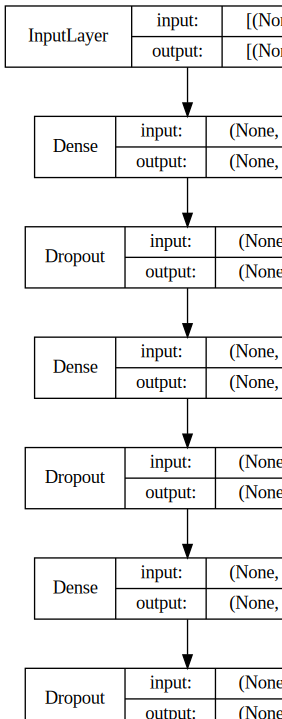

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# SVG stands for Scalable Vector Graphics. SVG defines vector-based graphics in XML format.
SVG(model_to_dot(w2v_dnn, show_shapes=True, show_layer_names=False, rankdir='TB').create(prog='dot', format='svg'))

<b>Model Training, Prediction and Performance Evaluation</b>

In [13]:
batch_size = 100
w2v_dnn.fit(avg_wv_train_features, y_train, epochs=5, batch_size=batch_size, shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/5
315/315 [==============================] - 3s 7ms/step - loss: 0.3081 - accuracy: 0.8717 - val_loss: 0.3002 - val_accuracy: 0.8740
Epoch 2/5
315/315 [==============================] - 2s 6ms/step - loss: 0.2826 - accuracy: 0.8855 - val_loss: 0.2939 - val_accuracy: 0.8780
Epoch 3/5
315/315 [==============================] - 2s 7ms/step - loss: 0.2772 - accuracy: 0.8868 - val_loss: 0.2918 - val_accuracy: 0.8754
Epoch 4/5
315/315 [==============================] - 2s 7ms/step - loss: 0.2668 - accuracy: 0.8897 - val_loss: 0.2916 - val_accuracy: 0.8780
Epoch 5/5
315/315 [==============================] - 2s 7ms/step - loss: 0.2611 - accuracy: 0.8928 - val_loss: 0.2962 - val_accuracy: 0.8766


In [55]:
y_pred = w2v_dnn.predict(avg_wv_test_features)
prediction=[]
for n in y_pred:
    if n[1]>n[0]:
        prediction.append('positive')
    else:
        prediction.append('negative')

469/469 [==============================] - 1s 1ms/step


In [17]:
print(test_sentiments)

['negative' 'positive' 'negative' ... 'negative' 'negative' 'negative']


In [56]:
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=prediction, classes=['positive', 'negative'])  

Model Performance metrics:
------------------------------
Accuracy: 0.8828
Precision: 0.8836
Recall: 0.8828
F1 Score: 0.8827

Model Classification report:
------------------------------


TypeError: classification_report() got an unexpected keyword argument 'codes'

In [62]:
glove_dnn = construct_deepnn_architecture(num_input_features=300)

In [64]:
batch_size = 100
glove_dnn.fit(train_glove_features, y_train, epochs=5, batch_size=batch_size, shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/5


ValueError: in user code:

    File "/home/neel/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/neel/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/neel/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/neel/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/home/neel/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/neel/anaconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 300), found shape=(100, 96)


In [ ]:
y_pred = glove_dnn.predict_classes(test_glove_features)
predictions = le.inverse_transform(y_pred) 

In [ ]:
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predictions, classes=['positive', 'negative']) 